In [71]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
# Load the dataset
df = pd.read_excel("C:\\Users\\safiy\\Downloads\\classification1.csv.xlsx")

In [75]:
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

In [77]:
# Handle missing data for numerical columns
imputer_num = SimpleImputer(strategy='mean')
df[numerical_cols] = imputer_num.fit_transform(df[numerical_cols])

# Identify columns with mixed types
mixed_type_cols = [col for col in categorical_cols if df[col].apply(type).nunique() > 1]

# Handle mixed type columns separately
for col in mixed_type_cols:
    # Convert datetime objects to strings
    df[col] = df[col].astype(str)

imputer_cat = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = imputer_cat.fit_transform(df[categorical_cols])

In [79]:
# Convert categorical features to numerical features
label_encoders = {}
for column in categorical_cols:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [81]:
# Split the data into features and target
X = df.drop('target', axis=1)  # assuming 'target' is the column name for the target variable
y = df['target']

In [83]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [85]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [87]:
# Initialize the classifier
rf_classifier = RandomForestClassifier(random_state=42)

In [89]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [91]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [95]:
# Fit the model
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [97]:
# Best parameters
best_params = grid_search.best_params_
best_rf_classifier = grid_search.best_estimator_

In [99]:
# Feature importance
importances = best_rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]

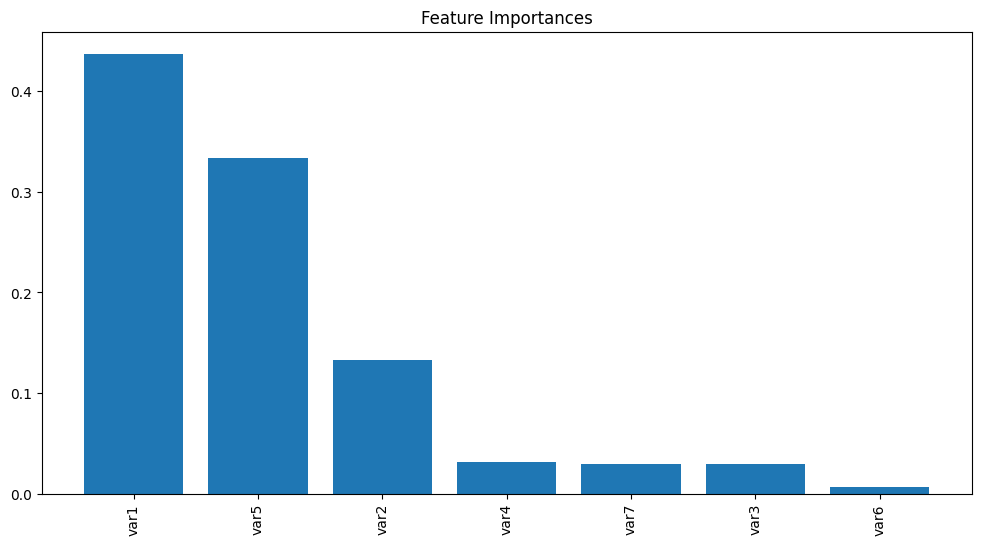

In [101]:
# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation=90)
plt.show()

In [103]:
# Predictions and confusion matrix
y_pred = best_rf_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

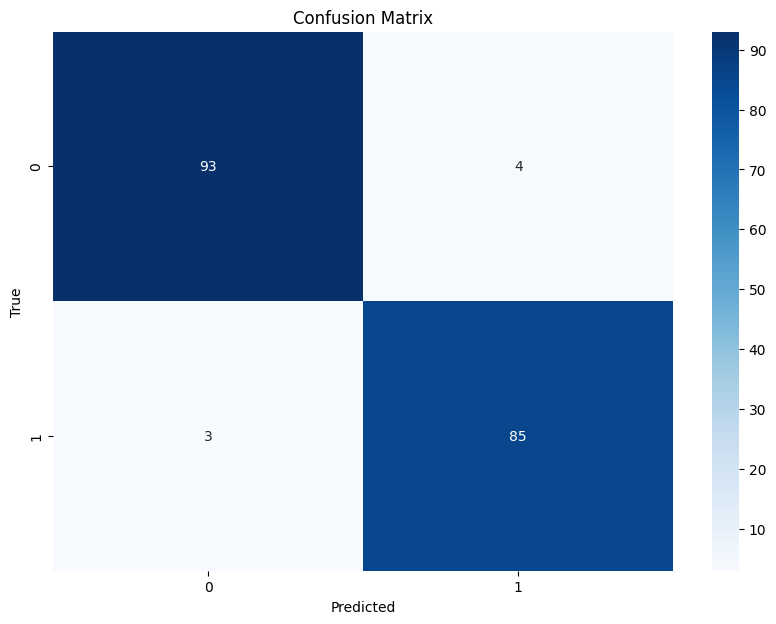

In [105]:
# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [107]:
# Classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.97      0.96      0.96        97
         1.0       0.96      0.97      0.96        88

    accuracy                           0.96       185
   macro avg       0.96      0.96      0.96       185
weighted avg       0.96      0.96      0.96       185

